# NetworkXによるダイクストラ法

対応する動画：[NetworkXによるネットワーク分析　⑬ダイクストラ法【研究で使うPython #43】](https://youtu.be/bn5Q98NzDUA)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 必要モジュールのインポート

In [1]:
import networkx as nx

## ネットワークの生成

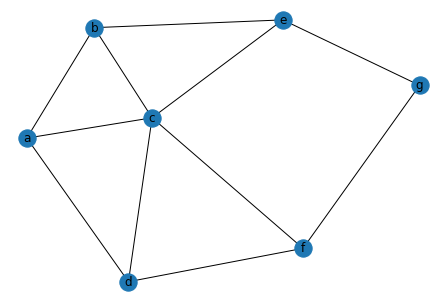

In [2]:
G = nx.Graph() # 空のグラフ生成

# 重み付きグラフの生成
G.add_weighted_edges_from([('a', 'b', 8), ('a', 'c', 9), ('a', 'd', 4), ('b', 'c', 5), 
                           ('b', 'e', 6), ('c', 'd', 1), ('c', 'e', 4), ('c', 'f', 2), 
                           ('d', 'f', 6), ('e', 'g', 9), ('f', 'g', 3)])
# ばねモデルでノード配置
pos=nx.spring_layout(G)

# 描画
nx.draw(G, pos, with_labels=True)

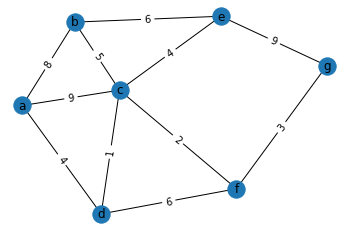

In [3]:
# 重み（距離）の表示
#nx.draw_networkx_edge_labels(G,pos)

# 重みのみの表示
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

# 再描画
nx.draw(G, pos, with_labels=True)

## ダイクストラ法の組み込み関数を使った最短経路計算

In [4]:
# 最短経路を求める
print('SからGまでの最短経路', nx.dijkstra_path(G, 'a', 'g'))

# その時の距離
print('距離', nx.dijkstra_path_length(G, 'a', 'g'))

# 最短経路と距離の一括表示
print('一括表示', nx.single_source_dijkstra(G, 'a', 'g'))
print()

# 2ノード間ならどこでも求まる
print('指定した2ノード間の距離')
print(nx.single_source_dijkstra(G, 'a', 'b'))
print(nx.single_source_dijkstra(G, 'a', 'c'))
print(nx.single_source_dijkstra(G, 'a', 'd'))
print(nx.single_source_dijkstra(G, 'a', 'e'))
print(nx.single_source_dijkstra(G, 'a', 'f'))

SからGまでの最短経路 ['a', 'd', 'c', 'f', 'g']
距離 10
一括表示 (10, ['a', 'd', 'c', 'f', 'g'])

指定した2ノード間の距離
(8, ['a', 'b'])
(5, ['a', 'd', 'c'])
(4, ['a', 'd'])
(9, ['a', 'd', 'c', 'e'])
(7, ['a', 'd', 'c', 'f'])
